# MovieRecommender Notebook
## Lucas Meyer
### May 15, 2023

This notebook was mainly used for testing and evaluating the Recommender system that I implemented. It also acts as a guide on how to use the `MovieRecommender` class.

For further information on the use of the `MovieRecommender` class, please refer to the ``README.md`` file in the root of the Github repository.

## Getting started
Importing the MovieRecommender class and NumPy:

In [1]:
import numpy as np
from movie_recommender import MovieRecommender

Initializing a MovieRecommender object, loading a pre-trained model, and plotting the loss/error:

Initializing ...
Movie Recommender initialized.


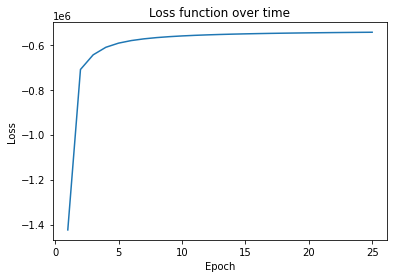

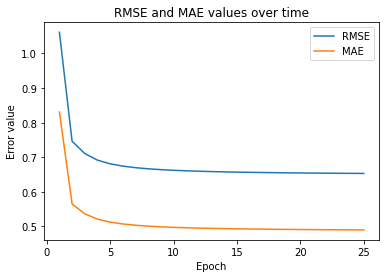

In [2]:
model = MovieRecommender(small_dataset=False)
model.load_model(k = 20, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=25)
model.plot_loss()

## Making predictions for ''dummy users''

I have copy-and-pasted the predict function here:

In [3]:
# This method is used to evaluate the dummy user predictions
def predict(model: MovieRecommender, item_ids: list = [], item_ratings: list = [], num_predictions: int = 5, spec_name: str = None):
    
    # Check for simple errors
    if (not model.trained):
        raise Exception("Model has not been trained or loaded.")
    assert len(item_ids) == len(item_ratings)
    if (len(item_ids) == 0):
        print("No movies entered ...")
        return False

    # Print stuff ...
    print(f"{'-'*120}\nPredictions for:")
    for id, rating in zip(item_ids, item_ratings):
        print(f"  \u2022 {model.movie_names[id]}: {rating} [{model.movie_genres[id]}] [id = {id}]")
    print(f"{'-'*120}", end="\n")

    # Train the model with the new dummy user for the same number of epochs
    user_bias, user_vec = 0, np.random.normal(loc=2.5, scale=2.5/np.sqrt(model.k), size=model.k)
    for _ in range(20):
        b_u_m = 0.0
        for i, n in enumerate(item_ids):
            b_u_m += item_ratings[i] - np.inner(user_vec, model.V[n]) - model.b_v[n]
        user_bias = ((model.ll)/(model.alpha + model.ll*len(item_ids)))*b_u_m

        arr, vec = np.zeros(shape=(model.k, model.k)), np.zeros(shape=(model.k,))
        for i, n in enumerate(item_ids):
            arr += np.outer(model.V[n], model.V[n])
            vec += model.V[n] * (item_ratings[i] - user_bias - model.b_v[n])
        arr = arr*model.ll + model.tau*np.identity(model.k)
        arr = model.inv(arr)
        vec = model.ll*vec
        user_vec = np.dot(arr, vec)

    # Get all prediction of each movie for dummy user
    predictions = np.zeros(shape=(model.V.shape[0],))
    for i in range(model.V.shape[0]):
        predictions[i] = np.inner(user_vec, model.V[i]) + 0.05*model.b_v[i] + user_bias

    # Print the top predictions
    print(f"\nTop {num_predictions} ratings:")
    idx = np.flip(np.argsort(predictions))
    for i in idx[:num_predictions]:
        print(f" \u2022 {model.movie_names[i]}: {predictions[i]} [{model.movie_genres[i]}] [id = {i}]")

    # Print ratings for specific movies
    if (spec_name is not None):
        print("")
        for i in idx:
            if (spec_name in model.movie_names[i]):
                print(f"{model.movie_names[i]}: {predictions[i]} [{model.movie_genres[i]}] [id = {i}]")
    
    # Print stuff ...
    print("\n\n\n")

### Print the predictions for multiple dummy users (small dataset):

In [15]:
model = MovieRecommender(small_dataset=True)
model.load_model(k = 20, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=25)

predict(model, [3827], [5.0], 10)
predict(model, [4791], [5.0], 10)
predict(model, [0], [5.0], 10)

Initializing ...
Movie Recommender initialized.
------------------------------------------------------------------------------------------------------------------------
Predictions for:
  • Star Wars: Episode II - Attack of the Clones (2002): 5.0 [Action|Adventure|Sci-Fi|IMAX] [id = 3827]
------------------------------------------------------------------------------------------------------------------------

Top 10 ratings:
 • Star Wars: Episode II - Attack of the Clones (2002): 1.9888368813248805 [Action|Adventure|Sci-Fi|IMAX] [id = 3827]
 • Matrix Revolutions, The (2003): 1.9311323320851708 [Action|Adventure|Sci-Fi|Thriller|IMAX] [id = 4631]
 • Hellboy (2004): 1.8692135089509307 [Action|Adventure|Fantasy|Horror] [id = 4909]
 • Sgt. Bilko (1996): 1.867977368142493 [Comedy] [id = 540]
 • American Pie 2 (2001): 1.8361284395981994 [Comedy] [id = 3454]
 • Oblivion (2013): 1.816258308435031 [Action|Adventure|Sci-Fi|IMAX] [id = 8119]
 • We Were Soldiers (2002): 1.7968548270258837 [Action|Dr

### Print the predictions for multiple dummy users (full dataset):

In [16]:
model = MovieRecommender(small_dataset=False)
model.load_model(k = 20, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=25)

predict(model, [5270], [5.0], 10)
predict(model, [7028], [5.0], 10)
predict(model, [0], [5.0], 10)

Initializing ...
Movie Recommender initialized.
------------------------------------------------------------------------------------------------------------------------
Predictions for:
  • Star Wars: Episode II - Attack of the Clones (2002): 5.0 [Action|Adventure|Sci-Fi|IMAX] [id = 5270]
------------------------------------------------------------------------------------------------------------------------

Top 10 ratings:
 • Miss Violence (2013): 2.141231560819219 [Drama|Mystery] [id = 21746]
 • Strange Color Of Your Body's Tears, The (L'étrange couleur des larmes de ton corps) (2013): 2.11463120221031 [Mystery|Thriller] [id = 21790]
 • Glee: The 3D Concert Movie (2011): 2.1131969547722624 [Documentary|Musical] [id = 16851]
 • Lovey-Dovey (2007): 2.1095783094120453 [Comedy|Fantasy] [id = 43796]
 • The Fluffy Movie (2014): 2.1025168384596085 [Comedy] [id = 29039]
 • Star Wars: Episode III - Revenge of the Sith (2005): 2.099756049487391 [Action|Adventure|Sci-Fi] [id = 9950]
 • Star War

## Most/least polarizing movies
Usually the movies with the largest/smallest vector norm

In [25]:
from movie_recommender import MovieRecommender

model = MovieRecommender(small_dataset=False)
model.load_model(k = 20, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=25)

L1_norms = []
L2_norms = []

for n in range(model.V.shape[0]):
    v = model.V[n]
    L1_norms += [np.linalg.norm(v, 1)]
    L2_norms += [np.linalg.norm(v, 2)]

# L1 Norm
idx1 = np.argsort(L1_norms) # Ascending

L1_smallest = np.array(L1_norms)[idx1][:3]
mov_smallest = model.movie_names[idx1][:3]

L1_largest = np.array(L1_norms)[idx1][-3:]
mov_largest = model.movie_names[idx1][-3:]

print("L1 Norm results:\n")
print(mov_largest)
print(L1_largest, end="\n\n")
print(mov_smallest)
print(L1_smallest, end="\n\n\n")

# L2 Norm
idx2 = np.argsort(L2_norms) # Ascending

L2_smallest = np.array(L2_norms)[idx2][:3]
mov_smallest = model.movie_names[idx2][:3]

L2_largest = np.array(L2_norms)[idx2][-3:]
mov_largest = model.movie_names[idx2][-3:]

print("L2 Norm results:\n")
print(mov_largest)
print(L2_largest, end="\n\n")
print(mov_smallest)
print(L2_smallest, end="\n\n\n")

Initializing ...
Movie Recommender initialized.
L1 Norm results:

['Manos: The Hands of Fate (1966)' 'Room, The (2003)'
 'Birdemic: Shock and Terror (2010)']
[34.02765909 38.70718889 40.63732348]

['64: Part 1 (2016)' '64: Part 2 (2016)' 'The Lone Wolf Returns (1935)']
[1.67346213 1.68315035 1.68315035]


L2 Norm results:

['Expelled: No Intelligence Allowed (2008)'
 'Birdemic: Shock and Terror (2010)' 'Room, The (2003)']
[ 9.21358835 10.95132207 11.00425097]

['64: Part 1 (2016)' '64: Part 2 (2016)' 'The Lone Wolf Returns (1935)']
[0.45170503 0.45850453 0.45850453]




## Visualizing two-dimensional feature vector embeddings

### 1. Item vector embeddings

In [1]:
from movie_recommender import MovieRecommender

model = MovieRecommender(small_dataset=True)

Initializing ...
Movie Recommender initialized.


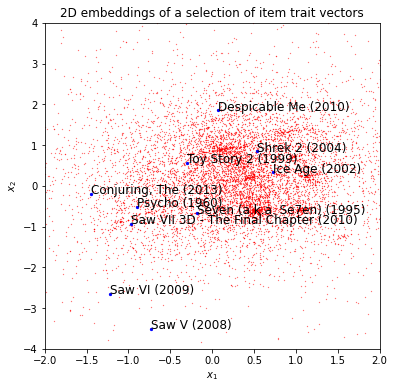

In [2]:
model.load_model(k=2, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=10)
model.plot_2D_vectors(spec_names=[
    "Toy Story 2", "Conjuring, The", "Saw V", "Ice Age (2002)", "The Shining"
    "Indiana Jones and the Temple", "Shrek 2", "Despicable Me (2010)", "Se7en", "Psycho (1960)"
])

In [2]:
model = MovieRecommender(small_dataset=False)

Initializing ...
Movie Recommender initialized.


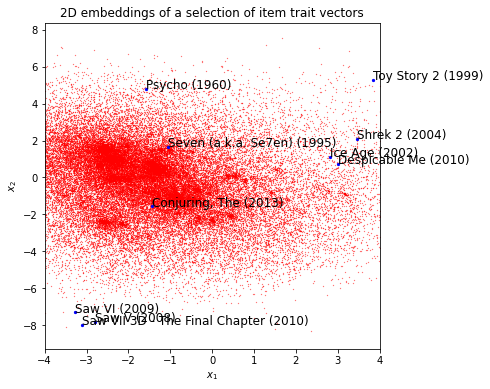

In [3]:
model.load_model(k=2, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=10)
model.plot_2D_vectors(spec_names=[
    "Toy Story 2", "Conjuring, The", "Saw V", "Ice Age (2002)", "The Shining"
    "Indiana Jones and the Temple", "Shrek 2", "Despicable Me (2010)", "Se7en", "Psycho (1960)"
])

### 2. Genre vector embeddings

Initializing ...
Movie Recommender initialized.


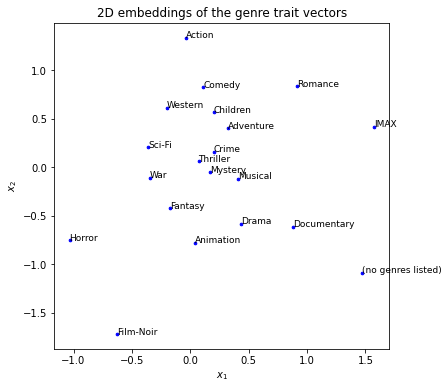

In [6]:
model = MovieRecommender(small_dataset=True)
model.load_model(k=2, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=10)
model.plot_2D_genre_vectors()

Initializing ...
Movie Recommender initialized.


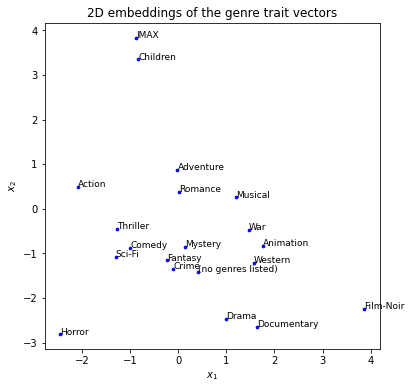

In [7]:
model = MovieRecommender(small_dataset=False)
model.load_model(k=2, ll=0.1, tau=0.01, alpha=0.01, beta=0.01, max_epoch=10)
model.plot_2D_genre_vectors()